In [1]:
# import of libraries we will use
%matplotlib inline
import random
#import tsfresh
import os
import math
from scipy import stats
from scipy.spatial.distance import pdist
from math import sqrt, log, floor
from fastdtw import fastdtw
import ipywidgets as widgets
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import seaborn as sns
from statistics import mean
from scipy.spatial.distance import euclidean
import scipy.cluster.hierarchy as hac
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.manifold import TSNE
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score, silhouette_score, silhouette_samples,calinski_harabasz_score
from sklearn.metrics import mean_squared_error
from scipy.spatial import distance
from jqmcvi import base 
import anomalous

sns.set(style='white')

In [2]:
path = "./data/Notificaciones/"
filename_read = os.path.join(path,"normalizado.csv")
notificaciones = pd.read_csv(filename_read,delimiter=",",engine='python')
notificaciones.shape

(57505, 8)

In [3]:
listaMunicp = notificaciones['distrito_nombre'].tolist()
listaMunicp = list(dict.fromkeys(listaMunicp))
print('Son ', len(listaMunicp), ' distritos')
listaMunicp.sort()
print(listaMunicp)

Son  217  distritos
['1RO DE MARZO', '25 DE DICIEMBRE', '3 DE FEBRERO', 'ABAI', 'ACAHAY', 'ALBERDI', 'ALTO VERA', 'ALTOS', 'ANTEQUERA', 'AREGUA', 'ARROYOS Y ESTEROS', 'ASUNCION', 'ATYRA', 'AYOLAS', 'AZOTEY', 'BAHIA NEGRA', 'BELEN', 'BELLA VISTA', 'BENJAMIN ACEVAL', 'BORJA', 'BUENA VISTA', 'CAACUPE', 'CAAGUAZU', 'CAAZAPA', 'CABALLERO ALVAREZ', 'CAMBYRETA', 'CAPIATA', 'CAPIIBARY', 'CAPITAN BADO', 'CAPITAN MEZA', 'CAPITAN MIRANDA', 'CARAGUATAY', 'CARAPEGUA', 'CARAYAO', 'CARLOS ANTONIO LOPEZ', 'CARMELO PERALTA', 'CARMEN DEL PARANA', 'CECILIO BAEZ', 'CERRITO', 'CHACO', 'CHORE', 'COLONIA FRAM', 'COLONIA INDEPENDENCIA', 'CONCEPCION', 'CORONEL BOGADO', 'CORONEL MARTINEZ', 'CORONEL OVIEDO', 'CORPUS CHRISTI', 'CURUGUATY', 'DESMOCHADOS', 'DR BOTRELL', 'DR. JUAN MANUEL FRUTOS', 'EDELIRA', 'EMBOSCADA', 'ENCARNACION', 'ESCOBAR', 'EUGENIO A GARAY', 'EUSEBIO AYALA', 'FASSARDI', 'FELIX PEREZ CARDOZO', 'FERNANDO DE LA MORA', 'FILADELFIA', 'FUERTE OLIMPO', 'GENERAL AQUINO', 'GENERAL ARTIGAS', 'GENERAL BE

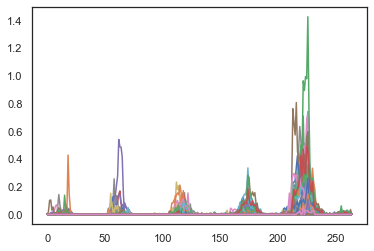

In [4]:
timeSeries = pd.DataFrame()
#c=0
for muni in listaMunicp:
    municipio=notificaciones['distrito_nombre']==muni
    notif_x_municp=notificaciones[municipio]
    notif_x_municp = notif_x_municp.reset_index(drop=True)
    notif_x_municp = notif_x_municp['incidencia']
    #notif_x_municp.replace([np.inf, -np.inf], np.nan)
    #print("Infinitos ",np.isfinite(notif_x_municp).all())
    #notif_x_municp.replace(r'^\s', 0.0, regex=True)
    #notif_x_municp.fillna(0)
    #notif_x_municp.replace(np.nan, 0.0)
    notif_x_municp = notif_x_municp.replace('nan', np.nan).fillna(0.000001)
    notif_x_municp = notif_x_municp.replace([np.inf, -np.inf], np.nan).fillna(0.000001)
    #notif_x_municp = notif_x_municp.apply(lambda x: x.str.strip()).replace('', 0.0)
    #print("Nulos ",notif_x_municp.isna().sum(),muni,c)
    #c=c+1
    #np.array(notif_x_municp)
    #df = pd.DataFrame(notif_x_municp)
    timeSeries = timeSeries.append(notif_x_municp)
    #print(notif_x_municp.shape)
    #print(muni)
    #print(notif_x_municp)
    ax = sns.lineplot(ax=None, data=notif_x_municp.values, err_style="band")

plt.show()

In [5]:
#timeseries shape
n=217

In [6]:
timeSeries.shape

(217, 265)

In [7]:
timeSeries.describe()

,0,1,2,3,4,5,6,7,8,9,...,255,256,257,258,259,260,261,262,263,264
count,2.170000e+02,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,...,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,2.170000e+02
mean,6.958525e-07,0.000128,0.000516,0.000689,0.000308,0.000549,0.000352,0.000533,0.000695,0.001134,...,0.001069,0.000978,0.000949,0.000868,0.000743,0.000950,0.000785,0.000737,0.001004,8.294931e-08
std,4.611091e-07,0.001390,0.006849,0.007184,0.002501,0.003937,0.002051,0.004073,0.004991,0.005355,...,0.005144,0.003715,0.003547,0.003291,0.003026,0.003761,0.003050,0.002860,0.003811,2.764433e-07
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000001,0.000001,0.000001,0.000001,0.000001,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,1.000000e-06,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
75%,1.000000e-06,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
max,1.000000e-06,0.020148,0.100739,0.104097,0.030222,0.053727,0.023579,0.057264,0.069054,0.052144,...,0.061607,0.030562,0.026823,0.022799,0.023103,0.030804,0.023103,0.018776,0.035218,1.000000e-06


In [8]:
#Euclidean
def euclidean(x, y):
    r=np.linalg.norm(x-y)
    if math.isnan(r):
        r=1
    #print(r)
    return r

In [9]:
#RMSE
def rmse(x, y):
    r=sqrt(mean_squared_error(x,y))
    if math.isnan(r):
        r=1
    #print(r)
    return r

In [10]:
#Fast Dynamic time warping
def fast_DTW(x, y):
    r, _ = fastdtw(x, y, dist=euclidean)
    if math.isnan(r):
        r=1
    #print(r)
    return r

In [11]:
#Correlation
def corr(x, y):
    r=(np.dot(x-mean(x),y-mean(y)))/((np.linalg.norm(x-mean(x)))*(np.linalg.norm(y-mean(y))))
    if math.isnan(r) or r<0:
        r=0
    #print(r)
    return 1 - r

In [12]:
#Spearman
def scorr(x, y):
    r = stats.spearmanr(x, y)[0]
    if math.isnan(r):
        r=0
    #print(r)
    return 1 - r

In [13]:
# compute distances using LCSS

# function for LCSS computation
# based on implementation from
# https://rosettacode.org/wiki/Longest_common_subsequence
def lcs(a, b):  
    lengths = [[0 for j in range(len(b)+1)] for i in range(len(a)+1)]
    # row 0 and column 0 are initialized to 0 already
    for i, x in enumerate(a):
        for j, y in enumerate(b):
            if x == y:
                lengths[i+1][j+1] = lengths[i][j] + 1
            else:
                lengths[i+1][j+1] = max(lengths[i+1][j], lengths[i][j+1])
    x, y = len(a), len(b)
    result = lengths[x][y]
    return result

def discretise(x):
    return int(x * 10)

def multidim_lcs(a, b):
    a = a.applymap(discretise)
    b = b.applymap(discretise)
    rows, dims = a.shape
    lcss = [lcs(a[i+2], b[i+2]) for i in range(dims)]
    return 1 - sum(lcss) / (rows * dims)

In [14]:
#Distancias para kmeans
#Euclidean
euclidean_dist = np.zeros((n,n))
for i in range(0,n):
    #print("i",i)
    for j in range(0,n):
       # print("j",j)
        euclidean_dist[i,j] = euclidean(timeSeries.iloc[i].values.flatten(), timeSeries.iloc[j].values.flatten())
#RMSE
#rmse_dist = np.zeros((n,n))
#for i in range(0,n):
    #print("i",i)
    #for j in range(0,n):
       # print("j",j)
        #rmse_dist[i,j] = rmse(timeSeries.iloc[i].values.flatten(), timeSeries.iloc[j].values.flatten())
#Corr
corr_dist = np.zeros((n,n))
for i in range(0,n):
    #print("i",i)
    for j in range(0,n):
       # print("j",j)
        corr_dist[i,j] = corr(timeSeries.iloc[i].values.flatten(), timeSeries.iloc[j].values.flatten())
#scorr
scorr_dist = np.zeros((n,n))
for i in range(0,n):
    #print("i",i)
    for j in range(0,n):
       # print("j",j)
        scorr_dist[i,j] = scorr(timeSeries.iloc[i].values.flatten(), timeSeries.iloc[j].values.flatten())
#DTW
dtw_dist = np.zeros((n,n))
for i in range(0,n):
    #print("i",i)
    for j in range(0,n):
       # print("j",j)
        dtw_dist[i,j] = fast_DTW(timeSeries.iloc[i].values.flatten(), timeSeries.iloc[j].values.flatten())

In [17]:
from yellowbrick.cluster import KElbowVisualizer
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(3,20),metric='distortion', timings=False)

visualizer.fit(rmse_dist)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

ModuleNotFoundError: No module named 'yellowbrick'

In [18]:
from sklearn.preprocessing import LabelEncoder

DIAMETER_METHODS = ['mean_cluster', 'farthest']
CLUSTER_DISTANCE_METHODS = ['nearest', 'farthest']


def inter_cluster_distances(labels, distances, method='nearest'):
    """Calculates the distances between the two nearest points of each cluster.
    :param labels: a list containing cluster labels for each of the n elements
    :param distances: an n x n numpy.array containing the pairwise distances between elements
    :param method: `nearest` for the distances between the two nearest points in each cluster, or `farthest`
    """
    if method not in CLUSTER_DISTANCE_METHODS:
        raise ValueError(
            'method must be one of {}'.format(CLUSTER_DISTANCE_METHODS))

    if method == 'nearest':
        return __cluster_distances_by_points(labels, distances)
    elif method == 'farthest':
        return __cluster_distances_by_points(labels, distances, farthest=True)


def __cluster_distances_by_points(labels, distances, farthest=False):
    n_unique_labels = len(np.unique(labels))
    cluster_distances = np.full((n_unique_labels, n_unique_labels),
                                float('inf') if not farthest else 0)

    np.fill_diagonal(cluster_distances, 0)

    for i in np.arange(0, len(labels) - 1):
        for ii in np.arange(i, len(labels)):
            if labels[i] != labels[ii] and (
                (not farthest and
                 distances[i, ii] < cluster_distances[labels[i], labels[ii]])
                    or
                (farthest and
                 distances[i, ii] > cluster_distances[labels[i], labels[ii]])):
                cluster_distances[labels[i], labels[ii]] = cluster_distances[
                    labels[ii], labels[i]] = distances[i, ii]
    return cluster_distances


def diameter(labels, distances, method='farthest'):
    """Calculates cluster diameters
    :param labels: a list containing cluster labels for each of the n elements
    :param distances: an n x n numpy.array containing the pairwise distances between elements
    :param method: either `mean_cluster` for the mean distance between all elements in each cluster, or `farthest` for the distance between the two points furthest from each other
    """
    if method not in DIAMETER_METHODS:
        raise ValueError('method must be one of {}'.format(DIAMETER_METHODS))

    n_clusters = len(np.unique(labels))
    diameters = np.zeros(n_clusters)

    if method == 'mean_cluster':
        for i in range(0, len(labels) - 1):
            for ii in range(i + 1, len(labels)):
                if labels[i] == labels[ii]:
                    diameters[labels[i]] += distances[i, ii]

        for i in range(len(diameters)):
            diameters[i] /= sum(labels == i)

    elif method == 'farthest':
        for i in range(0, len(labels) - 1):
            for ii in range(i + 1, len(labels)):
                if labels[i] == labels[ii] and distances[i, ii] > diameters[
                        labels[i]]:
                    diameters[labels[i]] = distances[i, ii]
    return diameters


def dunn(labels, distances, diameter_method='farthest',
         cdist_method='nearest'):
    """
    Dunn index for cluster validation (larger is better).
    
    .. math:: D = \\min_{i = 1 \\ldots n_c; j = i + 1\ldots n_c} \\left\\lbrace \\frac{d \\left( c_i,c_j \\right)}{\\max_{k = 1 \\ldots n_c} \\left(diam \\left(c_k \\right) \\right)} \\right\\rbrace
    
    where :math:`d(c_i,c_j)` represents the distance between
    clusters :math:`c_i` and :math:`c_j`, and :math:`diam(c_k)` is the diameter of cluster :math:`c_k`.
    Inter-cluster distance can be defined in many ways, such as the distance between cluster centroids or between their closest elements. Cluster diameter can be defined as the mean distance between all elements in the cluster, between all elements to the cluster centroid, or as the distance between the two furthest elements.
    The higher the value of the resulting Dunn index, the better the clustering
    result is considered, since higher values indicate that clusters are
    compact (small :math:`diam(c_k)`) and far apart (large :math:`d \\left( c_i,c_j \\right)`).
    :param labels: a list containing cluster labels for each of the n elements
    :param distances: an n x n numpy.array containing the pairwise distances between elements
    :param diameter_method: see :py:function:`diameter` `method` parameter
    :param cdist_method: see :py:function:`diameter` `method` parameter
    
    .. [Kovacs2005] Kovács, F., Legány, C., & Babos, A. (2005). Cluster validity measurement techniques. 6th International Symposium of Hungarian Researchers on Computational Intelligence.
    """

    labels = LabelEncoder().fit(labels).transform(labels)
    
    

    ic_distances = inter_cluster_distances(labels, distances, cdist_method)
    #print("IC",ic_distances)
    if len(ic_distances[ic_distances.nonzero()])==0:
        min_distance = 0
    else:
        min_distance = min(ic_distances[ic_distances.nonzero()])
    max_diameter = max(diameter(labels, distances, diameter_method))
    
    

    return min_distance / max_diameter



In [19]:
 
arr = np.array([[0, 0, 0], [0, 0, 0], [0, 0, 0]]) 
  
print ("Input  array : \n", arr) 
    
out_tpl = arr[np.nonzero(arr)]
print ("Indices of non zero elements : ", out_tpl)  

Input  array : 
 [[0 0 0]
 [0 0 0]
 [0 0 0]]
Indices of non zero elements :  []


In [20]:
k=9

In [1]:
#Experimentos HAC
HAC_euc = AgglomerativeClustering(n_clusters=k).fit_predict(euclidean_dist)
silhouette_avg=silhouette_score( euclidean_dist, HAC_euc)
print("HAC + euclidian distance: ")
print("SC: ",silhouette_score( euclidean_dist, HAC_euc))
print("CHZ: ",calinski_harabasz_score(euclidean_dist, HAC_euc))
print("DUNN: ",dunn(HAC_euc, euclidean_dist, 'farthest', 'farthest'))
#HAC_rmse = AgglomerativeClustering(n_clusters=k).fit_predict(f_rmse_dist)
#print("HAC + rmse distance: ",silhouette_score( f_rmse_dist, HAC_rmse))
HAC_corr = AgglomerativeClustering(n_clusters=k).fit_predict(corr_dist)
print("HAC + corr distance: ")
print("SC: ",silhouette_score( corr_dist,HAC_corr))
print("CHZ: ",calinski_harabasz_score(corr_dist,HAC_corr))
print("DUNN: ",dunn(HAC_corr, corr_dist, 'farthest', 'farthest'))
#print("HAC + corr distance: ",0.0)
HAC_scorr = AgglomerativeClustering(n_clusters=k).fit_predict(scorr_dist)
print("HAC + scorr distance: ")
print("SC: ",silhouette_score( scorr_dist, HAC_scorr))
print("CHZ: ",calinski_harabasz_score(scorr_dist, HAC_scorr))
print("DUNN: ",dunn(HAC_scorr, scorr_dist, 'farthest', 'farthest'))
HAC_dtw = AgglomerativeClustering(n_clusters=k).fit_predict(dtw_dist)
print("HAC + dtw distance: ")
print("SC: ",silhouette_score( dtw_dist, HAC_dtw))
print("CHZ: ",calinski_harabasz_score(dtw_dist, HAC_dtw))
print("DUNN: ",dunn(HAC_dtw, dtw_dist, 'farthest', 'farthest'))

NameError: name 'AgglomerativeClustering' is not defined

In [ ]:
km_euc = KMeans(n_clusters=k).fit_predict(euclidean_dist)
silhouette_avg=silhouette_score( euclidean_dist, km_euc)
print("KM + euclidian distance: ")
print("SC: ",silhouette_score( euclidean_dist, km_euc))
print("CHZ: ",calinski_harabasz_score(euclidean_dist, km_euc))
print("DUNN: ",dunn(km_euc, euclidean_dist, 'farthest', 'farthest'))
#km_rmse = KMeans(n_clusters=k).fit_predict(rmse_dist)
#print("KM + rmse distance: ")
#print("SC: ",silhouette_score( rmse_dist, km_rmse))
#print("DUNN: ",base.dunn(km_rmse))
km_corr = KMeans(n_clusters=k).fit_predict(corr_dist)
print("KM + corr distance: ")
print("SC: ",silhouette_score( corr_dist, km_corr))
print("CHZ: ",calinski_harabasz_score(corr_dist, km_corr))
print("DUNN: ",dunn(km_corr, corr_dist, 'farthest', 'farthest'))
km_scorr = KMeans(n_clusters=k).fit_predict(scorr_dist)
print("KM + scorr distance: ")
print("SC: ",silhouette_score( scorr_dist, km_scorr))
print("CHZ: ",calinski_harabasz_score(scorr_dist, km_scorr))
print("DUNN: ",dunn(km_scorr, scorr_dist, 'farthest', 'farthest'))
km_dtw = KMeans(n_clusters=k).fit_predict(dtw_dist)
print("KM + dtw distance: ")
print("SC: ",silhouette_score( dtw_dist, km_dtw))
print("CHZ: ",calinski_harabasz_score(dtw_dist, km_dtw))
print("DUNN: ",dunn(km_dtw, dtw_dist, 'farthest', 'farthest'))

In [2]:
#Experimentos DBSCAN
DB_euc = DBSCAN(eps=3, min_samples=2).fit_predict(euclidean_dist)
silhouette_avg=silhouette_score( euclidean_dist, DB_euc)
print("DBSCAN + euclidian distance: ")
print("SC: ",silhouette_score( euclidean_dist, DB_euc))
print("CHZ: ",calinski_harabasz_score(euclidean_dist, DB_euc))
print("DUNN: ",dunn(DB_euc, euclidean_dist, 'farthest', 'farthest'))
#DB_rmse = DBSCAN(eps=12, min_samples=10).fit_predict(rmse_dist)
#print("DBSCAN + rmse distance: ",silhouette_score( rmse_dist, DB_rmse))
#print("DBSCAN + rmse distance: ",0.00000000)
DB_corr = DBSCAN(eps=3, min_samples=2).fit_predict(corr_dist)
#print("DBSCAN + corr distance: ")
#print("SC: ",silhouette_score( corr_dist, DB_corr))
#print("CHZ: ",calinski_harabasz_score(corr_dist, DB_corr))
#print("DUNN: ",dunn(DB_corr, corr_dist, 'farthest', 'farthest'))
DB_scorr = DBSCAN(eps=3, min_samples=2).fit_predict(scorr_dist)
print("DBSCAN + scorr distance: ")
print("SC: ",silhouette_score( scorr_dist, DB_scorr))
print("CHZ: ",calinski_harabasz_score(scorr_dist, DB_scorr))
print("DUNN: ",dunn(DB_scorr, scorr_dist, 'farthest', 'farthest'))
DB_dtw = DBSCAN(eps=3, min_samples=2).fit_predict(dtw_dist)
print("KM + dtw distance: ")
print("SC: ",silhouette_score( dtw_dist, DB_dtw))
print("CHZ: ",calinski_harabasz_score( dtw_dist, DB_dtw))
print("DUNN: ",dunn(DB_dtw, dtw_dist, 'farthest', 'farthest'))

NameError: name 'DBSCAN' is not defined

In [3]:
#timeSeries['indice'] = range(1, len(timeSeries) + 1)
#timeSeries.sample(20)

In [4]:
from tsfresh import extract_features

#features extraction
extracted_features = extract_features(timeSeries, column_id="indice")

ModuleNotFoundError: No module named 'tsfresh'

In [ ]:
extracted_features.shape

In [ ]:
list(extracted_features.columns.values)

In [ ]:
n=217
features = pd.DataFrame()
Mean=[]
Var=[]
aCF1=[]
Peak=[]
Entropy=[]
Cpoints=[]
for muni in listaMunicp:
    municipio=notificaciones['distrito_nombre']==muni
    notif_x_municp=notificaciones[municipio]
    notif_x_municp = notif_x_municp.reset_index(drop=True)
    notif_x_municp = notif_x_municp['incidencia']
    notif_x_municp = notif_x_municp.replace('nan', np.nan).fillna(0.000001)
    notif_x_municp = notif_x_municp.replace([np.inf, -np.inf], np.nan).fillna(0.000001)
    #Features
    mean=tsfresh.feature_extraction.feature_calculators.mean(notif_x_municp)
    var=tsfresh.feature_extraction.feature_calculators.variance(notif_x_municp)
    ACF1=tsfresh.feature_extraction.feature_calculators.autocorrelation(notif_x_municp,1)
    #trend=tsfresh.feature_extraction.feature_calculators.agg_linear_trend(notif_x_municp,'attr': pvalue})
    #linearity=tsfresh.feature_extraction.feature_calculators.linear_trend(notif_x_municp,10)
    #curvature=
    #season=
    peak=tsfresh.feature_extraction.feature_calculators.number_peaks(notif_x_municp,20)
    #trough=
    entropy=tsfresh.feature_extraction.feature_calculators.sample_entropy(notif_x_municp)
    #lumpiness=
    #spikiness=
    #lshift=
    #vchange=
    #fspots=
    cpoints=tsfresh.feature_extraction.feature_calculators.number_crossing_m(notif_x_municp,5)
    #klscore=
    if math.isnan(mean):
        mean=0.0
    if math.isnan(var):
        var=0.0
    if math.isnan(ACF1):
        ACF1=0.0
    if math.isnan(peak):
        peak=0
    if math.isnan(entropy):
        entropy=0.0
    if math.isnan(cpoints):
        cpoints=0
    Mean.append(mean)
    Var.append(var)
    aCF1.append(ACF1)
    Peak.append(peak)
    Entropy.append(entropy)
    Cpoints.append(cpoints)
    


In [ ]:
data_tuples = list(zip(Mean,Var,aCF1,Peak,Entropy,Cpoints))
features = pd.DataFrame(data_tuples, columns =['Mean', 'Var', 'ACF1', 'Peak','Entropy','Cpoints']) 
# print the data 
features.shape

In [36]:
 y = anomalous.ts_measures(timeSeries, freq=30)
print(y.shape)

C:\Users\juanv\Backup Cluster\Dirigido\anomalous\tsmeasures.py:136: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  all_stl = sm.tsa.seasonal_decompose(cont_x, freq=freq)
C:\Users\juanv\Backup Cluster\Dirigido\anomalous\tsmeasures.py:136: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  all_stl = sm.tsa.seasonal_decompose(cont_x, freq=freq)
C:\Users\juanv\Backup Cluster\Dirigido\anomalous\tsmeasures.py:136: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  all_stl = sm.tsa.seasonal_decompose(cont_x, freq=freq)
C:\Users\juanv\Backup Cluster\Dirigido\anomalous\tsmeasures.py:136: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  all_stl = sm.tsa.seasonal_decompose(cont_x, freq=freq)
C:\Users\juanv\Backup Cluster\Dirigido\anomalous\tsmeasures.py:136: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  all_stl = sm.tsa.seasonal_decompose(cont_x, freq=freq)
C:\Users\juanv\Backu

C:\Users\juanv\Backup Cluster\Dirigido\anomalous\tsmeasures.py:136: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  all_stl = sm.tsa.seasonal_decompose(cont_x, freq=freq)
C:\Users\juanv\Backup Cluster\Dirigido\anomalous\tsmeasures.py:136: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  all_stl = sm.tsa.seasonal_decompose(cont_x, freq=freq)
C:\Users\juanv\Backup Cluster\Dirigido\anomalous\tsmeasures.py:136: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  all_stl = sm.tsa.seasonal_decompose(cont_x, freq=freq)
C:\Users\juanv\Backup Cluster\Dirigido\anomalous\tsmeasures.py:136: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  all_stl = sm.tsa.seasonal_decompose(cont_x, freq=freq)
C:\Users\juanv\Backup Cluster\Dirigido\anomalous\tsmeasures.py:136: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  all_stl = sm.tsa.seasonal_decompose(cont_x, freq=freq)
C:\Users\juanv\Backu

C:\Users\juanv\Backup Cluster\Dirigido\anomalous\tsmeasures.py:136: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  all_stl = sm.tsa.seasonal_decompose(cont_x, freq=freq)
C:\Users\juanv\Backup Cluster\Dirigido\anomalous\tsmeasures.py:136: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  all_stl = sm.tsa.seasonal_decompose(cont_x, freq=freq)
C:\Users\juanv\Backup Cluster\Dirigido\anomalous\tsmeasures.py:136: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  all_stl = sm.tsa.seasonal_decompose(cont_x, freq=freq)
C:\Users\juanv\Backup Cluster\Dirigido\anomalous\tsmeasures.py:136: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  all_stl = sm.tsa.seasonal_decompose(cont_x, freq=freq)
C:\Users\juanv\Backup Cluster\Dirigido\anomalous\tsmeasures.py:136: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  all_stl = sm.tsa.seasonal_decompose(cont_x, freq=freq)
C:\Users\juanv\Backu

C:\Users\juanv\Backup Cluster\Dirigido\anomalous\tsmeasures.py:136: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  all_stl = sm.tsa.seasonal_decompose(cont_x, freq=freq)
C:\Users\juanv\Backup Cluster\Dirigido\anomalous\tsmeasures.py:136: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  all_stl = sm.tsa.seasonal_decompose(cont_x, freq=freq)
C:\Users\juanv\Backup Cluster\Dirigido\anomalous\tsmeasures.py:136: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  all_stl = sm.tsa.seasonal_decompose(cont_x, freq=freq)
C:\Users\juanv\Backup Cluster\Dirigido\anomalous\tsmeasures.py:136: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  all_stl = sm.tsa.seasonal_decompose(cont_x, freq=freq)
C:\Users\juanv\Backup Cluster\Dirigido\anomalous\tsmeasures.py:136: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  all_stl = sm.tsa.seasonal_decompose(cont_x, freq=freq)
C:\Users\juanv\Backu

C:\Users\juanv\Backup Cluster\Dirigido\anomalous\tsmeasures.py:136: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  all_stl = sm.tsa.seasonal_decompose(cont_x, freq=freq)
C:\Users\juanv\Backup Cluster\Dirigido\anomalous\tsmeasures.py:136: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  all_stl = sm.tsa.seasonal_decompose(cont_x, freq=freq)
C:\Users\juanv\Backup Cluster\Dirigido\anomalous\tsmeasures.py:136: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  all_stl = sm.tsa.seasonal_decompose(cont_x, freq=freq)
C:\Users\juanv\Backup Cluster\Dirigido\anomalous\tsmeasures.py:136: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  all_stl = sm.tsa.seasonal_decompose(cont_x, freq=freq)
C:\Users\juanv\Backup Cluster\Dirigido\anomalous\tsmeasures.py:136: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  all_stl = sm.tsa.seasonal_decompose(cont_x, freq=freq)
C:\Users\juanv\Backu

C:\Users\juanv\Backup Cluster\Dirigido\anomalous\tsmeasures.py:136: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  all_stl = sm.tsa.seasonal_decompose(cont_x, freq=freq)
C:\Users\juanv\Backup Cluster\Dirigido\anomalous\tsmeasures.py:136: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  all_stl = sm.tsa.seasonal_decompose(cont_x, freq=freq)
C:\Users\juanv\Backup Cluster\Dirigido\anomalous\tsmeasures.py:136: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  all_stl = sm.tsa.seasonal_decompose(cont_x, freq=freq)
C:\Users\juanv\Backup Cluster\Dirigido\anomalous\tsmeasures.py:136: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  all_stl = sm.tsa.seasonal_decompose(cont_x, freq=freq)
C:\Users\juanv\Backup Cluster\Dirigido\anomalous\tsmeasures.py:136: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  all_stl = sm.tsa.seasonal_decompose(cont_x, freq=freq)
C:\Users\juanv\Backu

C:\Users\juanv\Backup Cluster\Dirigido\anomalous\tsmeasures.py:136: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  all_stl = sm.tsa.seasonal_decompose(cont_x, freq=freq)
C:\Users\juanv\Backup Cluster\Dirigido\anomalous\tsmeasures.py:136: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  all_stl = sm.tsa.seasonal_decompose(cont_x, freq=freq)
C:\Users\juanv\Backup Cluster\Dirigido\anomalous\tsmeasures.py:136: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  all_stl = sm.tsa.seasonal_decompose(cont_x, freq=freq)
C:\Users\juanv\Backup Cluster\Dirigido\anomalous\tsmeasures.py:136: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  all_stl = sm.tsa.seasonal_decompose(cont_x, freq=freq)
C:\Users\juanv\Backup Cluster\Dirigido\anomalous\tsmeasures.py:136: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  all_stl = sm.tsa.seasonal_decompose(cont_x, freq=freq)
C:\Users\juanv\Backu

(265, 17)


In [37]:
y.iloc[264]

lumpiness     1.337879e-03
ACF1         -3.030303e-02
lshift        0.000000e+00
vchange       0.000000e+00
cpoints       3.400000e+01
fspots        3.900000e+01
trend         0.000000e+00
linearity     5.457149e-03
curvature     3.499158e-01
spikiness     6.619778e-07
season        1.320951e-01
peak          2.323413e-01
trough       -1.009921e-01
KLscore                NaN
change_idx             NaN
boxcox        8.472136e+00
variable      2.640000e+02
Name: incidencia, dtype: float64

In [38]:
features=y

In [39]:
features = features.replace('nan', np.nan).fillna(0.000001)

In [40]:
#Distancias para kmeans
#Euclidean
f_euclidean_dist = np.zeros((n,n))
for i in range(0,n):
    #print("i",i)
    for j in range(1,n):
        #print("j",j)
        f_euclidean_dist[i,j] = euclidean(features.iloc[i].values.flatten(), features.iloc[j].values.flatten())
#RMSE
#f_rmse_dist = np.zeros((n,n))
#for i in range(0,n):
    #print("i",i)
#    for j in range(0,n):
       # print("j",j)
#        f_rmse_dist[i,j] = rmse(features.iloc[i].values.flatten(), features.iloc[j].values.flatten())
#Corr
print(features.iloc[i].values.flatten())
print(features.iloc[j].values.flatten())
print('-------------------------------')
f_corr_dist = np.zeros((n,n))
for i in range(0,n):
    #print("i",i)
    for j in range(0,n):
        #print("j",j)
        #print(features.iloc[i].values.flatten())
        #print(features.iloc[j].values.flatten())
        f_corr_dist[i,j] = corr(features.iloc[i].values.flatten(), features.iloc[j].values.flatten())
#scorr
f_scorr_dist = np.zeros((n,n))
for i in range(0,n):
    #print("i",i)
    for j in range(0,n):
       # print("j",j)
        f_scorr_dist[i,j] = scorr(features.iloc[i].values.flatten(), features.iloc[j].values.flatten())
#DTW
f_dtw_dist = np.zeros((n,n))
for i in range(0,n):
    #print("i",i)
    for j in range(0,n):
       # print("j",j)
        f_dtw_dist[i,j] = fast_DTW(features.iloc[i].values.flatten(), features.iloc[j].values.flatten())

[ 1.44432503e-04  1.45477466e-01  8.76018608e-03  3.84797271e-04
  2.00000000e+00  3.30000000e+01  0.00000000e+00  1.95265648e-03
  9.55403304e-02  5.65374282e-08  1.14631315e-01  1.20273610e-01
 -2.98808191e-02  1.00000000e-06  1.00000000e-06  2.01529042e-01
  2.16000000e+02]
[ 1.44432503e-04  1.45477466e-01  8.76018608e-03  3.84797271e-04
  2.00000000e+00  3.30000000e+01  0.00000000e+00  1.95265648e-03
  9.55403304e-02  5.65374282e-08  1.14631315e-01  1.20273610e-01
 -2.98808191e-02  1.00000000e-06  1.00000000e-06  2.01529042e-01
  2.16000000e+02]
-------------------------------


In [41]:
np.count_nonzero(np.isnan(f_scorr_dist))


0

In [42]:
from yellowbrick.cluster import KElbowVisualizer
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(2,30),metric='silhouette', timings=False)

visualizer.fit(f_scorr_dist)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

ModuleNotFoundError: No module named 'yellowbrick'

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
# Instantiate the clustering model and visualizer
model = KMeans(4)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(timeSeries)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [ ]:
k=9

In [43]:
km_euc = KMeans(n_clusters=k).fit_predict(f_euclidean_dist)
silhouette_avg=silhouette_score( f_euclidean_dist, km_euc)
print("KM + euclidian distance: ")
print("SC: ",silhouette_score( f_euclidean_dist, km_euc))
print("CHZ: ",calinski_harabasz_score(  f_euclidean_dist, km_euc))
print("DUNN: ",dunn(km_euc, f_euclidean_dist, 'farthest', 'farthest'))
#km_rmse = KMeans(n_clusters=k).fit_predict(f_rmse_dist)
#print("KM + rmse distance: ",silhouette_score( f_rmse_dist, km_rmse))
km_corr = KMeans(n_clusters=k).fit_predict(f_corr_dist) #ESte tenía error cuidado con eso
print("KM + corr distance: ")
print("SC: ",silhouette_score( f_corr_dist, km_corr))
print("CHZ: ",calinski_harabasz_score(  f_corr_dist, km_corr))
print("DUNN: ",dunn(km_corr, f_corr_dist, 'farthest', 'nearest'))
#print("KM + corr distance: ",silhouette_score( f_corr_dist, 0.0))
km_scorr = KMeans(n_clusters=k).fit_predict(f_scorr_dist)
print("KM + scorr distance: ")
print("SC: ",silhouette_score( f_scorr_dist, km_scorr))
print("CHZ: ",calinski_harabasz_score(  f_scorr_dist, km_scorr))
print("DUNN: ",dunn(km_scorr, f_scorr_dist, 'farthest', 'farthest'))
km_dtw = KMeans(n_clusters=k).fit_predict(f_dtw_dist)
print("KM + dtw distance: ")
print("SC: ",silhouette_score( f_dtw_dist, km_dtw))
print("CHZ: ",calinski_harabasz_score(f_dtw_dist, km_dtw))
print("DUNN: ",dunn(km_dtw, f_dtw_dist, 'farthest', 'farthest'))

KM + euclidian distance: 
SC:  0.5086397702857045
CHZ:  288.9794114220239
DUNN:  0.550870137101849
KM + corr distance: 
SC:  0.5900598682897776
CHZ:  1131.9604947192147
DUNN:  0.0014394762063223278
KM + scorr distance: 
SC:  0.5982653497316567
CHZ:  258.81401629416627
DUNN:  0.0
KM + dtw distance: 
SC:  0.5063619561160078
CHZ:  246.9639153732259
DUNN:  0.8294389192175436


In [44]:
#Experimentos HAC
HAC_euc = AgglomerativeClustering(n_clusters=k).fit_predict(f_euclidean_dist)
silhouette_avg=silhouette_score( f_euclidean_dist, HAC_euc)
print("HAC + euclidian distance: ")
print("SC: ",silhouette_score( f_euclidean_dist, HAC_euc))
print("CHZ: ",calinski_harabasz_score(f_euclidean_dist, HAC_euc))
print("DUNN: ",dunn(HAC_euc, f_euclidean_dist, 'farthest', 'farthest'))
#HAC_rmse = AgglomerativeClustering(n_clusters=k).fit_predict(f_rmse_dist)
#print("HAC + rmse distance: ",silhouette_score( f_rmse_dist, HAC_rmse))
HAC_corr = AgglomerativeClustering(n_clusters=k).fit_predict(f_corr_dist)
print("HAC + corr distance: ")
print("SC: ",silhouette_score( f_corr_dist,HAC_corr))
print("CHZ: ",calinski_harabasz_score(f_corr_dist,HAC_corr))
print("DUNN: ",dunn(HAC_corr, f_corr_dist, 'farthest', 'farthest'))
#print("HAC + corr distance: ",0.0)
HAC_scorr = AgglomerativeClustering(n_clusters=k).fit_predict(f_scorr_dist)
print("HAC + scorr distance: ")
print("SC: ",silhouette_score( f_scorr_dist, HAC_scorr))
print("CHZ: ",calinski_harabasz_score(f_scorr_dist, HAC_scorr))
print("DUNN: ",dunn(HAC_scorr, f_scorr_dist, 'farthest', 'farthest'))
HAC_dtw = AgglomerativeClustering(n_clusters=k).fit_predict(f_dtw_dist)
print("HAC + dtw distance: ")
print("SC: ",silhouette_score( f_dtw_dist, HAC_dtw))
print("CHZ: ",calinski_harabasz_score(f_dtw_dist, HAC_dtw))
print("DUNN: ",dunn(HAC_dtw, f_dtw_dist, 'farthest', 'farthest'))

HAC + euclidian distance: 
SC:  0.5439234388877757
CHZ:  271.56912807500885
DUNN:  0.6294373396744838
HAC + corr distance: 
SC:  0.5629509468631578
CHZ:  974.2654315949757
DUNN:  7.573236288820181
HAC + scorr distance: 
SC:  0.5970939233844279
CHZ:  255.21303940883334
DUNN:  0.0
HAC + dtw distance: 
SC:  0.4963624092589079
CHZ:  238.7331569736965


C:\Users\juanv\anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
C:\Users\juanv\anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


DUNN:  0.7330854191448255


In [46]:
#Experimentos DBSCAN
DB_euc = DBSCAN(eps=3, min_samples=2).fit_predict(f_euclidean_dist)
silhouette_avg=silhouette_score( f_euclidean_dist, DB_euc)
print("DBSCAN + euclidian distance: ")
print("SC: ",silhouette_score( f_euclidean_dist, DB_euc))
print("CHZ: ",calinski_harabasz_score(f_euclidean_dist, DB_euc))
print("DUNN: ",dunn(DB_euc, f_euclidean_dist, 'farthest', 'farthest'))
#DB_rmse = DBSCAN(eps=12, min_samples=10).fit_predict(f_rmse_dist)
#print("DBSCAN + rmse distance: ",silhouette_score( f_rmse_dist, DB_rmse))
#print("DBSCAN + rmse distance: ",0.00000000)
DB_corr = DBSCAN(eps=3, min_samples=2).fit_predict(f_corr_dist)
print("DBSCAN + corr distance: ")
print("SC: ",silhouette_score( f_corr_dist, DB_corr))
print("CHZ: ",calinski_harabasz_score(f_corr_dist, DB_corr))
print("DUNN: ",dunn(DB_corr, f_corr_dist, 'farthest', 'farthest'))
#print("DBSCAN + corr distance: ",0.0)
DB_scorr = DBSCAN(eps=3, min_samples=2).fit_predict(f_scorr_dist)
print("DBSCAN + scorr distance: ")
print("SC: ",silhouette_score( f_scorr_dist, DB_scorr))
print("CHZ: ",calinski_harabasz_score(f_scorr_dist, DB_scorr))
print("DUNN: ",dunn(DB_scorr, f_scorr_dist, 'farthest', 'farthest'))
DB_dtw = DBSCAN(eps=3, min_samples=2).fit_predict(f_dtw_dist)
print("KM + dtw distance: ")
print("SC: ",silhouette_score( f_dtw_dist, DB_dtw))
print("CHZ: ",calinski_harabasz_score(f_dtw_dist, DB_dtw))
print("DUNN: ",dunn(DB_dtw, f_dtw_dist, 'farthest', 'farthest'))

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

(0.0, 317.0)

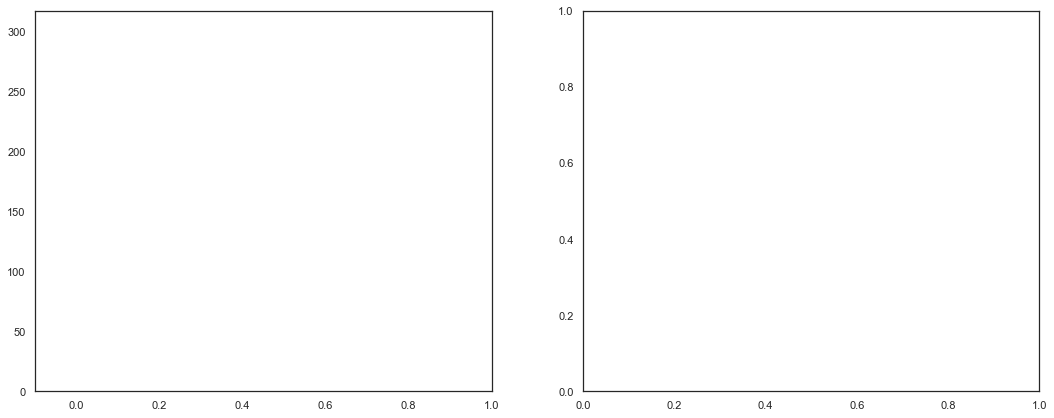

In [47]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(timeSeries) + (k + 1) * 10])

In [48]:
from collections import Counter, defaultdict
print(Counter(HAC_scorr))

Counter({5: 43, 1: 40, 7: 34, 0: 33, 4: 18, 8: 14, 2: 13, 3: 12, 6: 10})


NameError: name 'clusters' is not defined

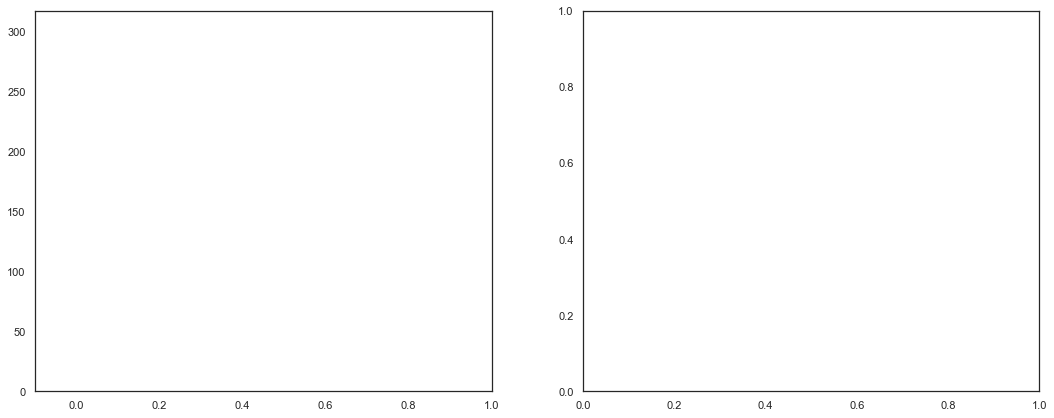

In [49]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
#plt.figure(figsize=(25, 20))
# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])

# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(timeSeries) + (k + 1) * 10])
# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(f_scorr_dist, HAC_scorr)
n_clusters=7
y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[clusters == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

plt.show()

In [ ]:
#tfs_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(features)
tfs_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(f_scorr_dist)
fig = plt.figure(figsize = (10, 10))
ax = plt.axes()
plt.scatter(tfs_embedded[:, 0], tfs_embedded[:, 1], marker = "x", c = HAC_scorr.labels_)
plt.show()

In [ ]:
tsne_3d_df=prepare_tsne(3,features, km_euc.labels_)
tsne_3d_df['normalized']=km_euc.kmeans.labels_
tsne_3d_df['dbscan']=db_euc.labels_
plot_animation(tsne_3d_df,'normalized','normalized')
plot_animation(tsne_3d_df,'dbscan','dbscan')
